In [166]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from IPython.display import HTML
import plotly.express as px

# 맥 폰트 깨짐 이슈 해결
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [167]:
names1880 = pd.read_csv("data/datasets/babynames/yob1880.txt",names=['name','sex','births'])
names1880

# 남자아이와 여자아이의 태어난 수
names1880.sex.value_counts() # 성별에 따른 "이름 종류"의 갯수
names1880.groupby('sex')['births'].sum() # 성별에 따른 태어난 아이들의 수

sex
F     90993
M    110493
Name: births, dtype: int64

In [168]:
for y in range(1880, 2011):
    frame=pd.read_csv(f"data/datasets/babynames/yob{y}.txt", names=['name', 'sex', 'births'])
    print(frame)
    print(str(y)+"="*50)

           name sex  births
0          Mary   F    7065
1          Anna   F    2604
2          Emma   F    2003
3     Elizabeth   F    1939
4        Minnie   F    1746
...         ...  ..     ...
1995     Woodie   M       5
1996     Worthy   M       5
1997     Wright   M       5
1998       York   M       5
1999  Zachariah   M       5

[2000 rows x 3 columns]
1880==================================================
           name sex  births
0          Mary   F    6919
1          Anna   F    2698
2          Emma   F    2034
3     Elizabeth   F    1852
4      Margaret   F    1658
...         ...  ..     ...
1930     Wiliam   M       5
1931     Wilton   M       5
1932       Wing   M       5
1933       Wood   M       5
1934     Wright   M       5

[1935 rows x 3 columns]
1881==================================================
           name sex  births
0          Mary   F    8149
1          Anna   F    3143
2          Emma   F    2303
3     Elizabeth   F    2187
4        Minnie   F    2004


         name sex  births
0        Mary   F   55477
1       Betty   F   31520
2     Barbara   F   26946
3     Dorothy   F   22039
4        Joan   F   19287
...       ...  ..     ...
9002     Zach   M       5
9003      Zan   M       5
9004   Zannie   M       5
9005   Zebbie   M       5
9006     Zeke   M       5

[9007 rows x 3 columns]
1933==================================================
         name sex  births
0        Mary   F   56898
1       Betty   F   31082
2     Barbara   F   29222
3     Shirley   F   22837
4     Dorothy   F   21283
...       ...  ..     ...
9173      Zan   M       5
9174   Zeddie   M       5
9175    Zenon   M       5
9176  Zigmund   M       5
9177  Zygmunt   M       5

[9178 rows x 3 columns]
1934==================================================
          name sex  births
0         Mary   F   55055
1      Shirley   F   42343
2      Barbara   F   30686
3        Betty   F   28660
4     Patricia   F   22876
...        ...  ..     ...
9026    Wilman   M       5


In [169]:
for y in range(1880, 2011):
    frame=pd.read_csv(f"data/datasets/babynames/yob{y}.txt", names=['name', 'sex', 'births'])
    frame['year']=y
    print(frame)
    print(str(y)+"="*50)

           name sex  births  year
0          Mary   F    7065  1880
1          Anna   F    2604  1880
2          Emma   F    2003  1880
3     Elizabeth   F    1939  1880
4        Minnie   F    1746  1880
...         ...  ..     ...   ...
1995     Woodie   M       5  1880
1996     Worthy   M       5  1880
1997     Wright   M       5  1880
1998       York   M       5  1880
1999  Zachariah   M       5  1880

[2000 rows x 4 columns]
1880==================================================
           name sex  births  year
0          Mary   F    6919  1881
1          Anna   F    2698  1881
2          Emma   F    2034  1881
3     Elizabeth   F    1852  1881
4      Margaret   F    1658  1881
...         ...  ..     ...   ...
1930     Wiliam   M       5  1881
1931     Wilton   M       5  1881
1932       Wing   M       5  1881
1933       Wood   M       5  1881
1934     Wright   M       5  1881

[1935 rows x 4 columns]
1881==================================================
           name sex  bir

In [170]:
pieces=[]
for y in range(1880, 2011):
    frame=pd.read_csv(f"data/datasets/babynames/yob{y}.txt", names=['name', 'sex', 'births'])
    frame['year']=y
    pieces.append(frame)
    # print(frame)
    # print(str(y)+"="*50)

names = pd.concat(pieces,ignore_index=True)

In [171]:
# pieces
names = pd.concat(pieces,ignore_index=True)

In [172]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [173]:
names.births.sum()
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [174]:
# Mary이름을 가지고 태어난 아이는 총 몇명?
names[names.name == 'Mary'].births.sum()

names[names.name == 'Mary']['births'].sum()

4119074

In [175]:
total_birth = names.pivot_table('births','year','sex',aggfunc='sum')

<Axes: xlabel='year'>

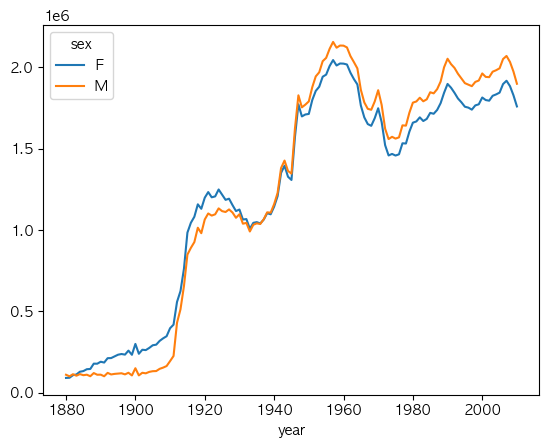

In [176]:
total_birth.plot() # 판다스에 시각화 기능 있음

In [177]:
names.groupby(['year','sex']).groups

{(1880, 'F'): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], (1880, 'M'): [942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, ...], (1881, 'F'): [2000, 2001, 2

In [178]:
# 1880년에 태어난 여자 아이의 총합으로 1880년에 태어난 각 여자 아이의 births열 나눔
# 이름의 비율
# 단계 별로 해보기

# 1단계
names['year'] == 1880
names['sex'] == 'F'

# 2단계
(names['year'] == 1880) & (names['sex'] == 'F')
names[(names['year'] == 1880) & (names['sex'] == 'F')]

# 3단계
names2 = names[(names['year'] == 1880) & (names['sex'] == 'F')]
names3 = names2.groupby('name')[['births']].sum()
names3/names3.births.sum()

,births
name,
Abbie,0.000780
Abby,0.000066
Abigail,0.000132
Ada,0.007165
Adah,0.000264
...,...
Zoe,0.000253
Zola,0.000077
Zona,0.000088


In [179]:
names2 = names[(names['year'] == 1880) & (names['sex'] == 'F')]
names3 = names2.groupby('name')[['births']].sum()
names3/names3.births.sum()

,births
name,
Abbie,0.000780
Abby,0.000066
Abigail,0.000132
Ada,0.007165
Adah,0.000264
...,...
Zoe,0.000253
Zola,0.000077
Zona,0.000088


In [180]:
names2.births / names2.births.sum()

0      0.077643
1      0.028618
2      0.022013
3      0.021309
4      0.019188
         ...   
937    0.000055
938    0.000055
939    0.000055
940    0.000055
941    0.000055
Name: births, Length: 942, dtype: float64

In [181]:
(names2.births / names2.births.sum()).sum()

1.0

In [182]:
names['year'] == 2010
names['sex'] == 'F'
(names['year'] == 2010) & (names['sex'] == 'F')
names2010 = names[(names['year'] == 2010) & (names['sex'] == 'F')]
names2010

,name,sex,births,year
1656946,Isabella,F,22731,2010
1656947,Sophia,F,20477,2010
1656948,Emma,F,17179,2010
1656949,Olivia,F,16860,2010
1656950,Ava,F,15300,2010
...,...,...,...,...
1676639,Zylynn,F,5,2010
1676640,Zyniya,F,5,2010
1676641,Zyonnah,F,5,2010
1676642,Zyriana,F,5,2010


In [183]:
names2010.births / names2010.births.sum()

1656946    0.012923
1656947    0.011641
1656948    0.009766
1656949    0.009585
1656950    0.008698
             ...   
1676639    0.000003
1676640    0.000003
1676641    0.000003
1676642    0.000003
1676643    0.000003
Name: births, Length: 19698, dtype: float64

In [184]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [185]:
def add_prop(grp):
    print(grp)
    print('='*50)

names.groupby(['year','sex']).apply(add_prop)

          name sex  births  year
0         Mary   F    7065  1880
1         Anna   F    2604  1880
2         Emma   F    2003  1880
3    Elizabeth   F    1939  1880
4       Minnie   F    1746  1880
..         ...  ..     ...   ...
937        Ula   F       5  1880
938     Vannie   F       5  1880
939     Verona   F       5  1880
940     Vertie   F       5  1880
941      Wilma   F       5  1880

[942 rows x 4 columns]
           name sex  births  year
942        John   M    9655  1880
943     William   M    9533  1880
944       James   M    5927  1880
945     Charles   M    5348  1880
946      George   M    5126  1880
...         ...  ..     ...   ...
1995     Woodie   M       5  1880
1996     Worthy   M       5  1880
1997     Wright   M       5  1880
1998       York   M       5  1880
1999  Zachariah   M       5  1880

[1058 rows x 4 columns]
           name sex  births  year
2000       Mary   F    6919  1881
2001       Anna   F    2698  1881
2002       Emma   F    2034  1881
2003  Eliza

/var/folders/bs/rn4q13z924s9_wzlq41h6grc0000gn/T/ipykernel_2803/4058796407.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



""


In [186]:
def add_prop(grp):
    # print(grp)
    # print('='*50)
    grp['prop']=grp['births']/grp['births'].sum()
    return grp

names.groupby(['year','sex']).apply(add_prop)

/var/folders/bs/rn4q13z924s9_wzlq41h6grc0000gn/T/ipykernel_2803/510808035.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1690779    Zymaire   M       5  2010  0.000003
         1690780     Zyonne   M       5  2010  0.000003
         1690781  Zyquarius   M       5  2010  0.000003
         1690782      Zyran   M       5  2010  0.000003
         1690783      Zzyzx   M       5  2010  0.000003

[1690784 rows x 5 columns]

In [187]:
def add_prop(grp):
    # print(grp)
    # print('='*50)
    grp['prop']=grp['births']/grp['births'].sum()
    return grp

names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)
# 그룹화시 사용 된 키들이 행 인덱스가 되지만, group_keys=False로 지정하여 행 인덱스가 되 않게 설정

/var/folders/bs/rn4q13z924s9_wzlq41h6grc0000gn/T/ipykernel_2803/3227282055.py:7: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [188]:
names.groupby(['year','sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
            ... 
2008  M      1.0
2009  F      1.0
      M      1.0
2010  F      1.0
      M      1.0
Name: prop, Length: 262, dtype: float64

In [189]:
names[(names.year == 1880) & (names.sex == 'F')]

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
937,Ula,F,5,1880,0.000055
938,Vannie,F,5,1880,0.000055
939,Verona,F,5,1880,0.000055
940,Vertie,F,5,1880,0.000055


In [190]:
names[(names.year == 1880) & (names.sex == 'M')]

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
1995,Woodie,M,5,1880,0.000045
1996,Worthy,M,5,1880,0.000045
1997,Wright,M,5,1880,0.000045
1998,York,M,5,1880,0.000045


In [191]:
names[(names.year == 2010) & (names.sex == 'F')]

,name,sex,births,year,prop
1656946,Isabella,F,22731,2010,0.012923
1656947,Sophia,F,20477,2010,0.011641
1656948,Emma,F,17179,2010,0.009766
1656949,Olivia,F,16860,2010,0.009585
1656950,Ava,F,15300,2010,0.008698
...,...,...,...,...,...
1676639,Zylynn,F,5,2010,0.000003
1676640,Zyniya,F,5,2010,0.000003
1676641,Zyonnah,F,5,2010,0.000003
1676642,Zyriana,F,5,2010,0.000003


In [192]:
names[(names.year == 2010) & (names.sex == 'M')]

,name,sex,births,year,prop
1676644,Jacob,M,21875,2010,0.011523
1676645,Ethan,M,17866,2010,0.009411
1676646,Michael,M,17133,2010,0.009025
1676647,Jayden,M,17030,2010,0.008971
1676648,William,M,16870,2010,0.008887
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [193]:
#상위 1000개 (1위~1000위) 이름에 대한 태언난 아이의 수

def getTop1000(grp):
    print(grp.sort_values('births', ascending=False)[:1000])
    print("="*50)

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(getTop1000)
top1000

          name sex  births  year      prop
0         Mary   F    7065  1880  0.077643
1         Anna   F    2604  1880  0.028618
2         Emma   F    2003  1880  0.022013
3    Elizabeth   F    1939  1880  0.021309
4       Minnie   F    1746  1880  0.019188
..         ...  ..     ...   ...       ...
866   Georgina   F       5  1880  0.000055
865      Genie   F       5  1880  0.000055
863      Etter   F       5  1880  0.000055
862      Estie   F       5  1880  0.000055
941      Wilma   F       5  1880  0.000055

[942 rows x 5 columns]
          name sex  births  year      prop
942       John   M    9655  1880  0.087381
943    William   M    9533  1880  0.086277
944      James   M    5927  1880  0.053641
945    Charles   M    5348  1880  0.048401
946     George   M    5126  1880  0.046392
...        ...  ..     ...   ...       ...
1880      Cleo   M       5  1880  0.000045
1881  Crockett   M       5  1880  0.000045
1882     Cyril   M       5  1880  0.000045
1883     Daisy   M       5  18

/var/folders/bs/rn4q13z924s9_wzlq41h6grc0000gn/T/ipykernel_2803/3889588248.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



""


In [194]:
def getTop1000(grp):
    return grp.sort_values('births', ascending=False)[:1000]
    #print("="*50)

grouped=names.groupby(['year','sex'])
top1000=grouped.apply(getTop1000)
top1000

/var/folders/bs/rn4q13z924s9_wzlq41h6grc0000gn/T/ipykernel_2803/2595122751.py:6: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
2010 M   1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

In [195]:
top1000 = top1000.reset_index(drop=True)
top1000
# 131*2 =262개 *1000 = 262000개

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [196]:
girls = top1000[top1000['sex']=='F']
boys = top1000[top1000['sex']=='M']
girls
boys

,name,sex,births,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [197]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [198]:
total_births = top1000.pivot_table("births", index="year",columns="name",aggfunc=sum)

/var/folders/bs/rn4q13z924s9_wzlq41h6grc0000gn/T/ipykernel_2803/3067422956.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



In [199]:
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [200]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


<Axes: xlabel='year'>

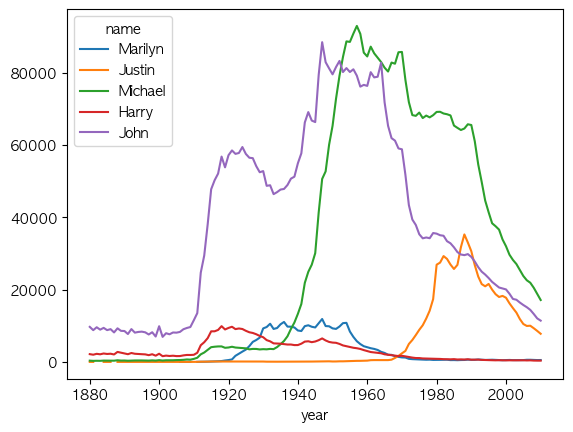

In [201]:
subset = total_births[['Marilyn', 'Justin', 'Michael', 'Harry', 'John']]
subset.plot()

array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>], dtype=object)

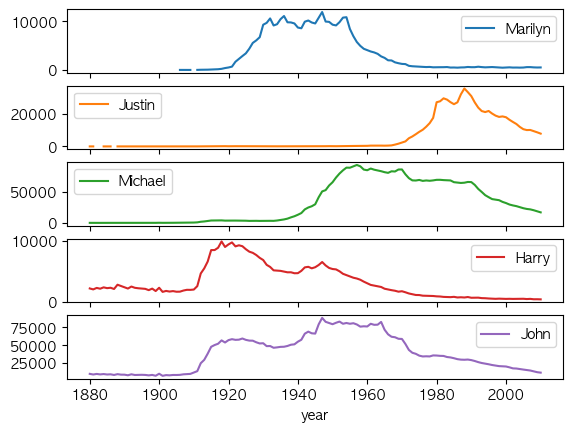

In [202]:
subset.plot(subplots=True)

In [203]:
# 이름의 다양성 1.00에 가까우면 다양성이 적고 멀어질수록 이름이 다양해진다
table = top1000.pivot_table("prop", index="year", columns="sex", aggfunc=sum)
table

/var/folders/bs/rn4q13z924s9_wzlq41h6grc0000gn/T/ipykernel_2803/1295548306.py:2: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



sex,F,M
year,,
1880,1.000000,0.997375
1881,1.000000,1.000000
1882,0.998702,0.995646
1883,0.997596,0.998566
1884,0.993156,0.994539
...,...,...
2006,0.753153,0.860368
2007,0.745959,0.855159
2008,0.740933,0.850003


<Axes: title={'center': 'sum of tb by year and sex'}, xlabel='year'>

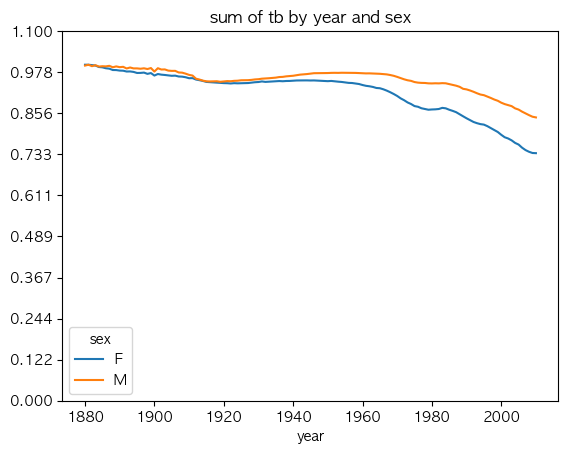

In [204]:
table.plot(title = 'sum of tb by year and sex', yticks = np.linspace(0,1.1,10))

In [205]:
df = boys[boys['year']==2010]
df

# 'prop' 기준 내림차순 정렬
df.sort_values('prop',ascending=False)
df['prop'].sort_values(ascending=False)
df['prop'].sort_values(ascending=False).cumsum()
prop_cumsum = df['prop'].sort_values(ascending=False).cumsum()

In [206]:
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
            ...   
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [207]:
# 50%지점이 어딜까? 0번 ~ 116번에서 0.5를 조금 넘음
prop_cumsum[:20] 

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
260887    0.097648
260888    0.105406
260889    0.112852
260890    0.120276
260891    0.127672
260892    0.135023
260893    0.142368
260894    0.149603
260895    0.156827
260896    0.164021
Name: prop, dtype: float64

In [208]:
# 50%지점이 어딜까? 0번 ~ 116번에서 0.5를 조금 넘음
prop_cumsum.searchsorted(0.5) # 비율이 50%가 막 넘었을 때 이름의 종류 갯수가 117(116+1)개
# 2010년에 태어난 남자아이들의 이름 중에서 상위 1000개의 이름을 추출했을때,
# 50% 비율에 해당되는 남자 아이 이름의 종류의 갯수가 117개가 있다.

116

In [209]:
# 2010년에 여자아이의 50% 구하기
# 방법 1
df2 = girls[girls['year'] == 2010]
prop_cumsum2 = df2['prop'].sort_values(ascending=False).cumsum()
prop_cumsum2.searchsorted(0.5) + 1

# 방법 2
df2 = girls[girls.year == 2010]
in2010 = df2.sort_values(by = 'prop', ascending = False).prop.cumsum()
in2010.searchsorted(0.5) + 1

246

In [210]:
# 1900년에 50% 남자아이 구하기
df = boys[boys.year == 1900]
in1900 = df.sort_values(by = 'prop', ascending = False).prop.cumsum()
in1900.searchsorted(0.5) + 1

25

In [211]:
# 1890 ~ 2010 성별에 따른 이름의 다양성 조사
def get_quantile_count(group, q=0.5):
    group = group.sort_values("prop", ascending=False)
    return group.prop.cumsum().searchsorted(q) + 1
    
    # print(group)
    # print("="*50)
diversity=top1000.groupby(["year", "sex"]).apply(get_quantile_count)
diversity

/var/folders/bs/rn4q13z924s9_wzlq41h6grc0000gn/T/ipykernel_2803/813582586.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



year  sex
1880  F       38
      M       14
1881  F       38
      M       14
1882  F       38
            ... 
2008  M      109
2009  F      241
      M      114
2010  F      246
      M      117
Length: 262, dtype: int64

In [212]:
diversity = diversity.unstack('sex')
diversity.dtypes

sex
F    int64
M    int64
dtype: object

<Axes: title={'center': 'Number of popular names in top 50%'}, xlabel='year'>

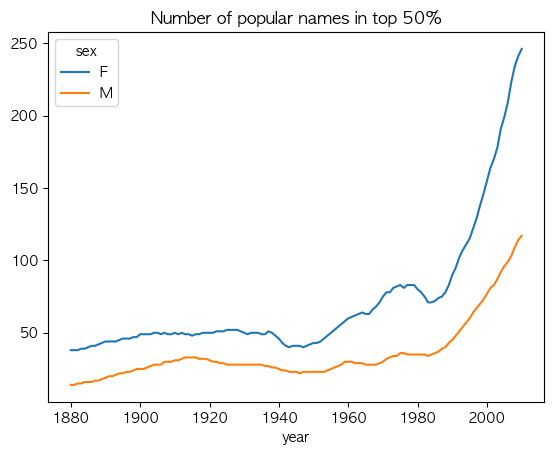

In [213]:
diversity.plot(title = 'Number of popular names in top 50%')

In [214]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [215]:
names['last_letter'] = names['name'].str[-1]
names['last_letter']

0          y
1          a
2          a
3          h
4          e
          ..
1690779    e
1690780    e
1690781    s
1690782    n
1690783    x
Name: last_letter, Length: 1690784, dtype: object

In [216]:
def get_last_letter(x):
    return x[-1]

last_letters = names["name"].map(get_last_letter)
last_letters.name = "last_letter"

In [217]:
pip install plotly==5.11.0

Note: you may need to restart the kernel to use updated packages.


In [218]:
# plotly 시각화
# 1) graph_objects모듈(세세하게 시각화)
# 2) express 모듈 (주로사용)

# 시각화 과정
# 그래프생성(graph_objects / express) -> 그래프 업데이트(add_trace함수, update_함수들)

In [219]:
from IPython.display import HTML

In [220]:
import plotly.express as px
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2],title="A Figure Specified By express")
fig.show() 
# HTML(fig.to_html()) # 위에 오류시 사용

In [221]:
df = px.data.iris()
df

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,3
146,6.3,2.5,5.0,1.9,virginica,3
147,6.5,3.0,5.2,2.0,virginica,3
148,6.2,3.4,5.4,2.3,virginica,3


In [222]:
import plotly.graph_objects as go

In [223]:
fig = go.Figure()

In [224]:
fig.add_trace(go.Bar(x=[1, 2, 3], y=[1, 3, 2]))
fig.show()

In [225]:
import plotly.express as px


df = px.data.iris()


fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species",
                 title="Using The add_trace() method With A Plotly Express Figure")

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/plotly/express/_core.py:1979: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [226]:
fig.show()

In [227]:
fig.add_trace(
    go.Scatter(
        x=[2, 4],
        y=[4, 8],
        mode="lines",
        line=go.scatter.Line(color="gray"),
        showlegend=False)
)

In [228]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2],width=600, height=400)

fig.show()

In [229]:
fig = go.Figure(data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])])

fig.update_layout(width=600,height=400)

fig.show()

In [230]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.update_layout(
    width=600,
    height=400,
    margin_l=50,
    margin_r=50,
    margin_b=100,
    margin_t=100,

    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [231]:
fig.update_layout(
    width=600,
    height=400,
    margin_l=50,
    margin_r=50,
    margin_b=100,
    margin_t=100,
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [232]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2], title="Title 설정하기")

fig.update_layout(
                 title_x = 0.5,
                 title_y = 0.9,
                 title_xanchor = "center",
                 title_yanchor = "middle")

fig.show()

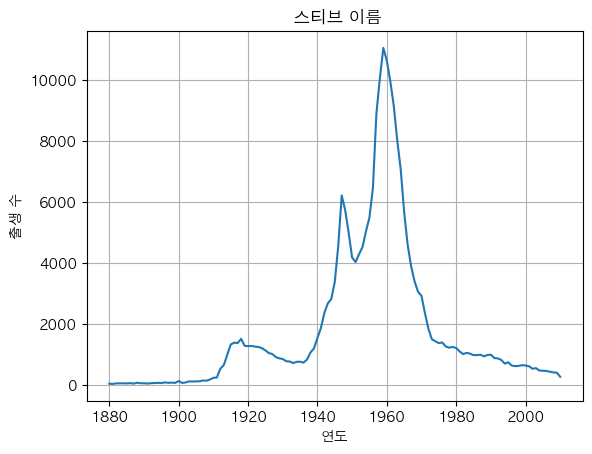

In [266]:
# 1. 최근 Steven이라는 이름은 최근 미국에서 인기있는 이름인가?
# 1910년부터 1920년엔는 상승하는 것으로 보아 잠시 인기가 있었고 
# 1940년부터 1960년까지는 큰 상승 폭으로 보아 이때 스티브라는 이름이 큰 인기가 있는 것으로 보입니다. 
# 하지만 1960년부터 현재까지 하락세으로 보아 60년대부터 최근까지 큰 인기가 없는 것으로 보입니다. 

pieces=[]
for y in range(1880, 2011):
    frame=pd.read_csv(f"data/datasets/babynames/yob{y}.txt", names=['name', 'sex', 'births'])
    frame['year']=y
    pieces.append(frame)

names = pd.concat(pieces,ignore_index=True)

# 'Steve'남자 아이의 이름 데이터
steve_names = names[(names['name'] == 'Steve') & (names['sex'] == 'M')]

# 연도별로 그룹화하고 출생 수 합계 계산
steve_trend = steve_names.groupby('year')['births'].sum()

# 시각화
steve_trend.plot(title=" 스티브 이름")
plt.xlabel('연도')
plt.ylabel('출생 수')
plt.grid(True)
plt.show()


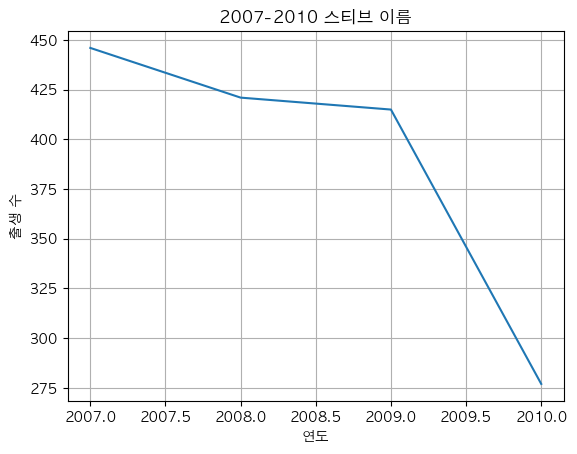

2007년-2010년 스티브 출생아 수
 year
2007    446
2008    421
2009    415
2010    277
Name: births, dtype: int64


In [265]:
# 1. 최근 Steven이라는 이름은 최근 미국에서 인기있는 이름인가?
# 2007년에는 446 / 2008년에는 421 / 2009년에는 415 / 2010년에는 277
# 감소하는 것으로 보아 큰 인기가 없어보입니다.

# 2. '아이폰 출시(2007년6월)' 이후 미국에서 스티브라는 출생아 이름이 증가했는가?
# 아이폰 출시 이후에 스티브라는 출생아 이름은 감소하고 있습니다.

# 2007년부터 2010년까지의 파일 경로 목록
df_0710 = [
    'data/datasets/babynames/yob2007.txt',
    'data/datasets/babynames/yob2008.txt',
    'data/datasets/babynames/yob2009.txt',
    'data/datasets/babynames/yob2010.txt'
]

pieces = []
for file_path in df_0710:
    year = int(file_path[-8:-4])  # 파일 이름에서 연도 추출
    frame = pd.read_csv(file_path, names=['name', 'sex', 'births'])
    frame['year'] = year  # 연도 컬럼 추가
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

# 'Steve'남자 아이의 이름 데이터
steve_names = names[(names['name'] == 'Steve') & (names['sex'] == 'M')]

# 연도별로 그룹화하고 출생 수 합계 계산
steve_trend = steve_names.groupby('year')['births'].sum()

# 시각화
steve_trend.plot(title="2007-2010 스티브 이름")
plt.xlabel('연도')
plt.ylabel('출생 수')
plt.grid(True)
plt.show()

# 데이터 출력
print("2007년-2010년 스티브 출생아 수\n",steve_trend)



In [235]:
# 3. 1960년 전까지 미국에서 TOP10순위 안에들정도로 인기있던 이름이, 1960년대 이후부터 왜 인기가 줄곧 시들해졌을까?


In [236]:
# 4. 여아/남아 모음의 비율? 성별과 관련이 있을까?


In [237]:
# 5. 아이의 이름에 가장 많이 등장하는 철자? 적게 등장하는 철자? 남자/여자 아이에서 가장 많이 등장하는 철자?


In [238]:
# 6. 과거에 인기 있던 이름 중에 최근에 인기가 없는 이름?


In [239]:
# 7. 작명인 입장 - 이름의 트렌드?